# 1.1.2 Solve 1st order wave equation

$
    \frac{\partial u}{\partial t} + c \frac{\partial u}{\partial x} = F(x,t)
$

Using finite difference stepping in time.

$
    \frac{u_{n}^{k+1} - u_{n}^{k}}{\Delta t} + c \frac{u_{n}^{k}-u_{n-1}^{k}}{\Delta x} = F_n^k \\
    {u_{n}^{k+1} = u_{n}^{k}} - \frac{c \Delta t}{\Delta x} \big( u_{n}^{k}-u_{n-1}^{k} \big) + \Delta t F_n^k 
$

In [1]:
from numpy import arange, insert, linspace

In [14]:
class waveEq:
    # static elements go here
    
    def __init__(self):
        # object elements go here, default case set
        self.c = 0.5
        self.T = 1.
        self.L = 1.
        self.dt = 1e-3
        self.dx = 1e-3
        
    def cfl(self):
        return self.c*self.dt/self.dx
    
    def checkCFL(self):
        while True:
            try:
                input = self.c*self.dt/self.dx
                if (input <= 1):
                    print("Satisfies CFL stability condition: %0.1f <= 1.0" %input)
                    return
                else:
                    print("Doesn't satisfy CFL condition: %0.4f > 1.0" %input)
                    break
            except:
                print ("That's not a number")

In [27]:
def bCs():
    return 2.0
def iCs(length):
    return linspace(1,1,length)
def forcing(length):
    return linspace(0,1,length)

def fdSolver(waveEq):
    print("\nInitializing finite difference solver...\n")
    # dizcretize space
    x = arange(0,waveEq.L,waveEq.dx)
    
    # ic = I(x) assuming all ones
    u0 = iCs(x.size)
    # bc = B(t) assuming constant
    bc = bCs()

    # Initialize solution field
    u = u0
    # add ghost node for downwind scheme
    u0 = insert(u, 0, 0)

    for ii in range(int(waveEq.T/waveEq.dt)):
        # impose an applied force field
        if (ii==1):
            f = forcing(x.size)
        else:
            f = linspace(0,0,x.size)
            
        # re-impose boundary condition
        u0[1] = bc
    
        u[:] = ( 1-waveEq.cfl() )*u0[1:] + waveEq.cfl()*u0[:-1] + waveEq.dt*f
        # step through time u --> u0, and loop through time
        u0[1:] = u
    # apply bc on final step
    u[0]=bc
    print("...finished running solver.")
    return u

In [28]:
q1 = waveEq()

q1.checkCFL()
u=fdSolver(q1)

Satisfies CFL stability condition: 0.5 <= 1.0

Initializing finite difference solver...

...finished running solver.


## Plotting reuslts for given IC and BCs

Let $u(x,0) = I(x) = \bf{1}$ and $u(0,t) = B(t) = 2$. 

The final result is plotted below

In [17]:
from matplotlib.pyplot import plot

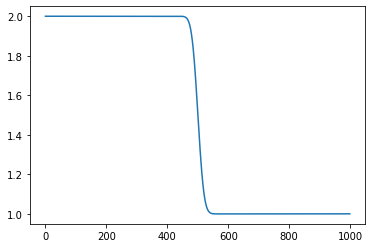

In [29]:
plot(u)

written by I. Escobar 2020